# Data Loading & Preparation

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

### Set seed for reproducibility

In [2]:
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
#tf.random.set_seed(seed)
#tf.compat.v1.set_random_seed(seed)

# Dataset
The dataset we have been provided contains images of plants' leaves. Leaves are divided into categories according to the species of the plant to which they belong.

### Details
*   Image size: 256x256
*   Color space: RGB
*   File Format: JPG
*   Number of classes: 14

### Class labels:
*   0. Apple
*   1. Blueberry
*   2. Cherry
*   3. Corn
*   4. Grape
*   5. Orange
*   6. Peach
*   7. Pepper
*   8. Potato
*   9. Raspberry
*   10. Soybean
*   11. Squash
*   12. Strawberry
*   13. Tomato


### Structure
Single folder:
*   training: containing 17728 images already divided in sub-folders, based on their class.

<b>Training images per class:</b>
*   Apple: 988
*   Blueberry: 467
*   Cherry: 583
*   Corn: 1206
*   Grape: 1458
*   Orange: 1748
*   Peach: 977
*   Pepper: 765
*   Potato: 716
*   Raspberry: 264
*   Soybean: 1616
*   Squash: 574
*   Strawberry: 673
*   Tomato: 5693






## Dataset inspection

In [ ]:
# Unzip the dataset to be used for classification
!unzip dataset.zip

Output streaming troncato alle ultime 5000 righe.
  inflating: training/Tomato/37979.jpg  
  inflating: training/Tomato/37980.jpg  
  inflating: training/Tomato/37982.jpg  
  inflating: training/Tomato/37983.jpg  
  inflating: training/Tomato/37984.jpg  
  inflating: training/Tomato/37985.jpg  
  inflating: training/Tomato/37988.jpg  
  inflating: training/Tomato/37989.jpg  
  inflating: training/Tomato/37990.jpg  
  inflating: training/Tomato/37992.jpg  
  inflating: training/Tomato/37993.jpg  
  inflating: training/Tomato/37994.jpg  
  inflating: training/Tomato/37995.jpg  
  inflating: training/Tomato/37996.jpg  
  inflating: training/Tomato/37997.jpg  
  inflating: training/Tomato/37998.jpg  
  inflating: training/Tomato/37999.jpg  
  inflating: training/Tomato/38000.jpg  
  inflating: training/Tomato/38001.jpg  
  inflating: training/Tomato/38003.jpg  
  inflating: training/Tomato/38004.jpg  
  inflating: training/Tomato/38005.jpg  
  inflating: training/Tomato/38006.jpg  
  infla

In [5]:
# Inspect dataset structure on disk
print("Depth 0:")
print("-------")
!ls training
print()
print("Depth 1 (e.g., training/Apple):")
print("------------------------")
!ls training/Apple

Depth 0:
-------
Apple	   Cherry  Grape   Peach   Potato     Soybean  Strawberry
Blueberry  Corn    Orange  Pepper  Raspberry  Squash   Tomato

Depth 1 (e.g., training/Apple):
------------------------
00001.jpg  00182.jpg  00355.jpg  00537.jpg  22499.jpg  22682.jpg  22855.jpg
00003.jpg  00183.jpg  00357.jpg  00538.jpg  22501.jpg  22683.jpg  22856.jpg
00004.jpg  00184.jpg  00358.jpg  00539.jpg  22502.jpg  22684.jpg  22857.jpg
00005.jpg  00185.jpg  00359.jpg  00540.jpg  22504.jpg  22685.jpg  22858.jpg
00006.jpg  00186.jpg  00360.jpg  00543.jpg  22505.jpg  22686.jpg  22859.jpg
00007.jpg  00187.jpg  00361.jpg  00544.jpg  22506.jpg  22687.jpg  22860.jpg
00008.jpg  00188.jpg  00362.jpg  00545.jpg  22507.jpg  22688.jpg  22861.jpg
00009.jpg  00189.jpg  00363.jpg  00546.jpg  22509.jpg  22690.jpg  22862.jpg
00011.jpg  00192.jpg  00364.jpg  00547.jpg  22510.jpg  22691.jpg  22863.jpg
00012.jpg  00193.jpg  00365.jpg  00548.jpg  22511.jpg  22693.jpg  22864.jpg
00013.jpg  00194.jpg  00366.jpg  00549.

In [6]:
fullDataset_dir = 'training'

### Plot example images from dataset

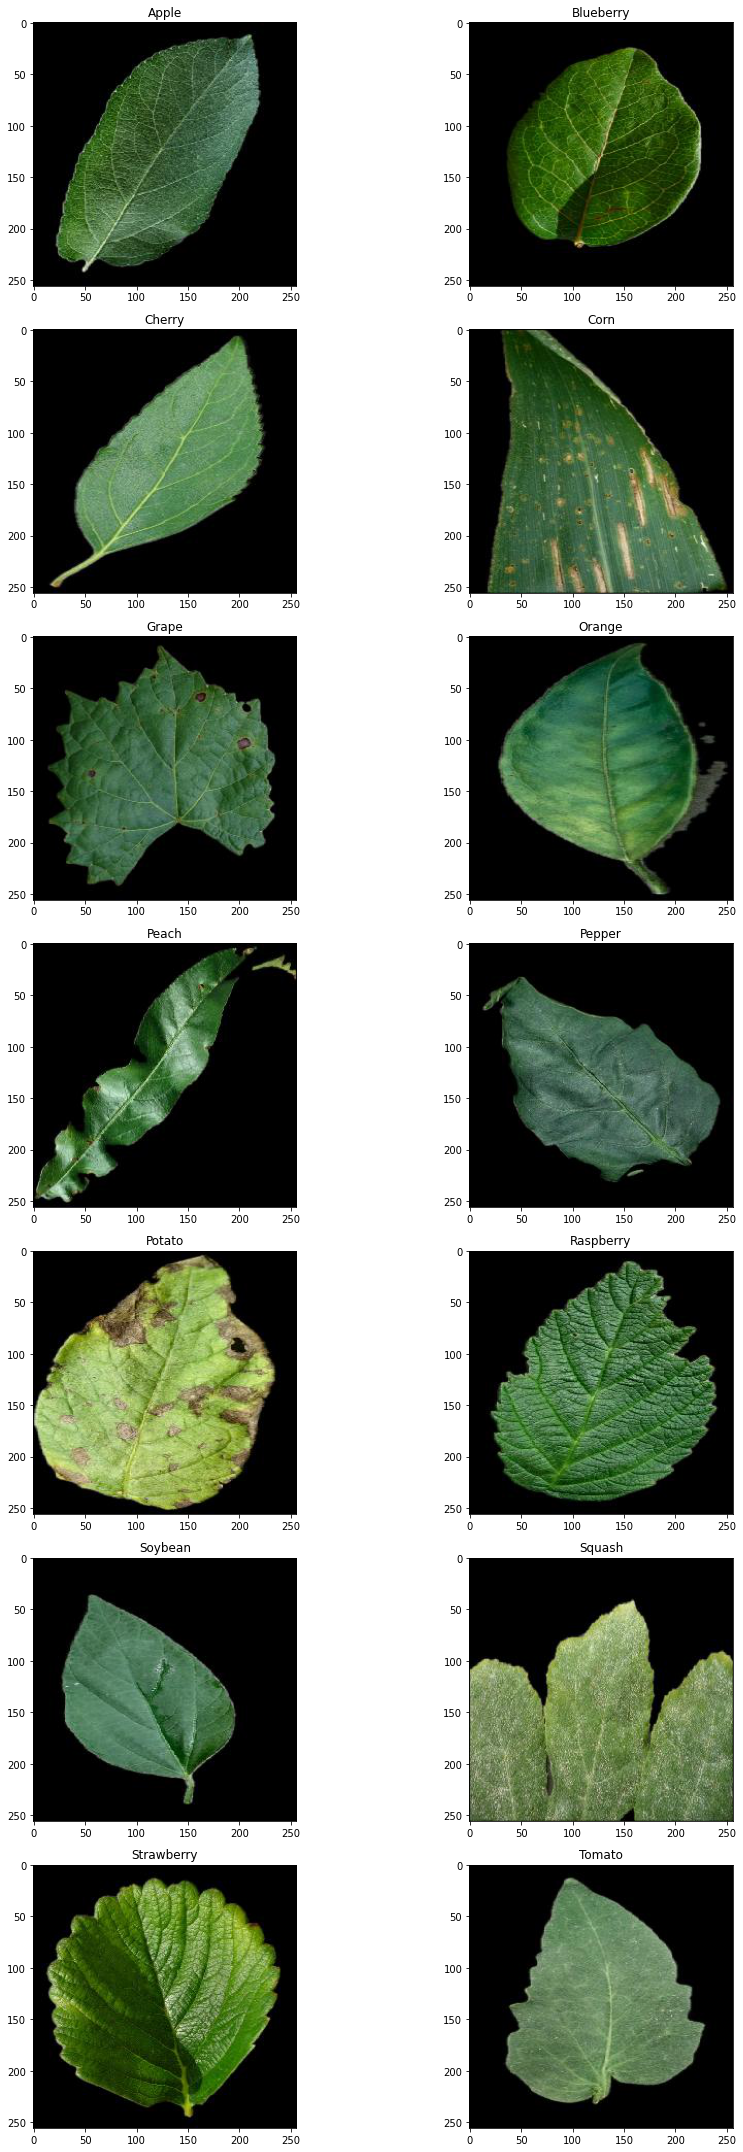

In [7]:
labels = ['Apple','Blueberry','Cherry','Corn','Grape','Orange','Peach','Pepper','Potato','Raspberry','Soybean','Squash','Strawberry','Tomato']

num_row = len(labels)//2
num_col = len(labels)//num_row
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_row,15*num_col))
for i in range(len(labels)):
  if i < len(labels):
    class_imgs = next(os.walk('{}/{}/'.format(fullDataset_dir, labels[i])))[2]
    class_img = class_imgs[0]
    img = Image.open('{}/{}/{}'.format(fullDataset_dir, labels[i], class_img))
    ax = axes[i//num_col, i%num_col]
    ax.imshow(np.array(img))
    ax.set_title('{}'.format(labels[i]))
plt.tight_layout()
plt.show()

### Distribution of the classes

In [8]:
# Images per class
num = []
for i in range(len(labels)):
  files = os.listdir(fullDataset_dir + '/' + labels[i])
  files = len(files)
  print(labels[i] + ': {}'.format(files))
  num.append(files)

Apple: 988
Blueberry: 467
Cherry: 583
Corn: 1206
Grape: 1458
Orange: 1748
Peach: 977
Pepper: 765
Potato: 716
Raspberry: 264
Soybean: 1616
Squash: 574
Strawberry: 673
Tomato: 5693


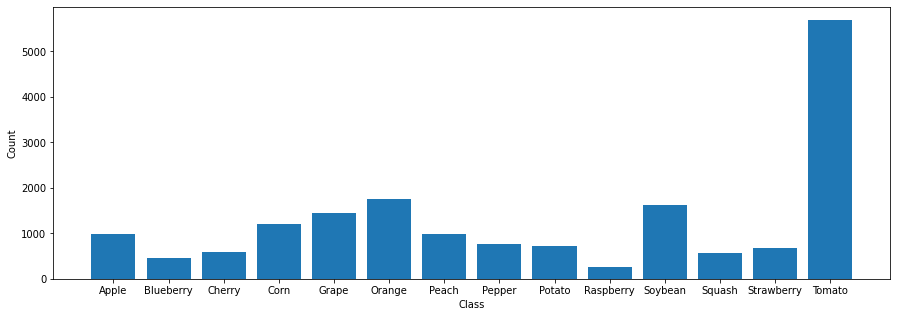

In [9]:
# Inspect the target
plt.figure(figsize=(15,5))
plt.bar(labels, num)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## Unbalanced dataset
The dataset needs to be split into train and validation subsets. To do this we used the <b>split-folders</b> python module, which allows to perform the splitting and saves the splitted dataset into a new folder
([https://pypi.org/project/split-folders/](https://pypi.org/project/split-folders/)).

Moreover, as it is visible from the histogram above, the dataset is highly unbalanced, meaning that the number of samples is different among classes. If not properly handled, this would lead to neural networks that are better at recognizing classes which are more represented in the dataset and worse in those which are less. Thus we need some strategy to face this problem.


#### We compared 2 different strategies: 
1. Splitting the dataset uniformly and applying corrective class weights
2. Splitting with oversampling 

In [10]:
pip install split-folders

In [11]:
import splitfolders

## 1st strategy: Preserve class distribution
We used the split-folders module to split the dataset between train and validation, mantaining class distribution.
We split in this way:
*   80% of the original dataset is reserved for training
*   The remaining 20% is reserved for validation 



In [ ]:
# splitfolders.ratio allows to mantain the SAME distribution of classes between train and validation
splitfolders.ratio('training', output='dataset_splitted', seed=seed, ratio=(.8,.2), group_prefix=None) # 'dataset_splitted' is the new folder 

### Dataset folders organization
The dataset folder (`dataset_splitted`) obtained after the splitting will contain 2 sub-folders:
1.   `val` folder
2.   `train` folder

Each sub-folder will contain a directory for each class.

In [12]:
# Inspect the splitted dataset structure on disk
print("Depth 0 (dataset_splitted")
print("-------")
!ls dataset_splitted
print()
print("Depth 1 (e.g., dataset_splitted/train)")
print("------------------------")
!ls dataset_splitted/train
print()
print("Depth 2 (e.g., dataset_splitted/train/Apple)")
print("----------------------------")
!ls dataset_splitted/train/Apple
print("Depth 2 (e.g., dataset_splitted/val/Apple)")
print("----------------------------")
!ls dataset_splitted/val/Apple

Depth 0 (dataset_splitted
-------
train  val

Depth 1 (e.g., dataset_splitted/train)
------------------------
Apple	   Cherry  Grape   Peach   Potato     Soybean  Strawberry
Blueberry  Corn    Orange  Pepper  Raspberry  Squash   Tomato

Depth 2 (e.g., dataset_splitted/train/Apple)
----------------------------
00001.jpg  00183.jpg  00360.jpg  00533.jpg  22479.jpg  22658.jpg  22845.jpg
00003.jpg  00184.jpg  00361.jpg  00534.jpg  22480.jpg  22660.jpg  22847.jpg
00004.jpg  00185.jpg  00362.jpg  00535.jpg  22482.jpg  22664.jpg  22848.jpg
00006.jpg  00187.jpg  00363.jpg  00536.jpg  22483.jpg  22667.jpg  22849.jpg
00007.jpg  00188.jpg  00364.jpg  00537.jpg  22484.jpg  22671.jpg  22850.jpg
00009.jpg  00189.jpg  00365.jpg  00538.jpg  22487.jpg  22673.jpg  22851.jpg
00011.jpg  00192.jpg  00366.jpg  00539.jpg  22488.jpg  22676.jpg  22853.jpg
00012.jpg  00193.jpg  00367.jpg  00543.jpg  22490.jpg  22677.jpg  22854.jpg
00013.jpg  00194.jpg  00372.jpg  00544.jpg  22492.jpg  22679.jpg  22855.jpg
00015

In [13]:
dataset_dir = 'dataset_splitted' # directory of the split dataset
training_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'val')

In [14]:
#  Training images per class
num = []
for i in range(len(labels)):
  files = os.listdir(training_dir + '/' + labels[i])
  files = len(files)
  print(labels[i] + ': {}'.format(files))
  num.append(files)

Apple: 790
Blueberry: 373
Cherry: 466
Corn: 964
Grape: 1166
Orange: 1398
Peach: 781
Pepper: 612
Potato: 572
Raspberry: 211
Soybean: 1292
Squash: 459
Strawberry: 538
Tomato: 4554


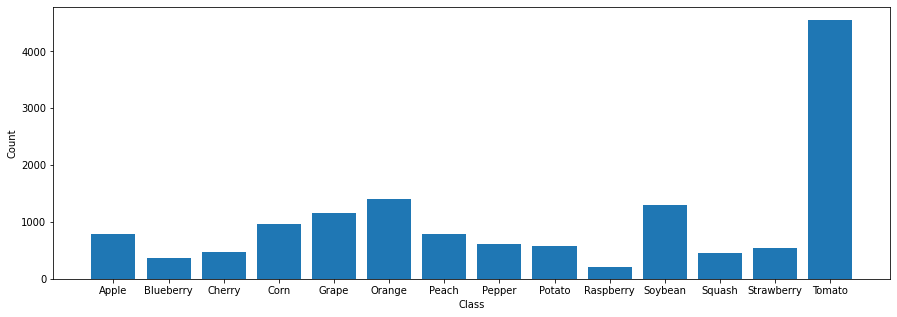

In [15]:
# Inspect the target
plt.figure(figsize=(15,5))
plt.bar(labels, num)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [16]:
#  Validation images per class
num = []
for i in range(len(labels)):
  files = os.listdir(validation_dir + '/' + labels[i])
  files = len(files)
  print(labels[i] + ': {}'.format(files))
  num.append(files)

Apple: 198
Blueberry: 94
Cherry: 117
Corn: 242
Grape: 292
Orange: 350
Peach: 196
Pepper: 153
Potato: 144
Raspberry: 53
Soybean: 324
Squash: 115
Strawberry: 135
Tomato: 1139


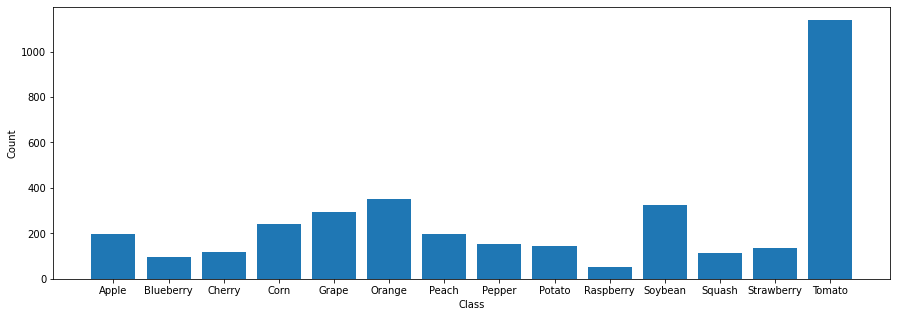

In [17]:
# Inspect the target
plt.figure(figsize=(15,5))
plt.bar(labels, num)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Application of class weights
We compute weights for the classes of the dataset by using the method `compute_class_weight` from sklearn. This way, classes are given a weight which is inversely proportional to their size. These weights will be later used during training so as to give more importance to the less represented classes and solve the unbalance of the dataset.

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an example data generator
example_data_gen = ImageDataGenerator()

example_gen = example_data_gen.flow_from_directory(directory=training_dir,
                                                          target_size=(256,256),
                                                          color_mode='rgb',
                                                          classes=None,
                                                          class_mode='categorical',
                                                          batch_size=16,
                                                          shuffle=True,
                                                          seed=seed)

Found 14176 images belonging to 14 classes.


In [20]:
from sklearn.utils import compute_class_weight

# Compute class weights
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(example_gen.classes),
                                        y = example_gen.classes                                                    
                                    )
class_weights = dict(zip(np.unique(example_gen.classes), class_weights))
print(class_weights)

{0: 1.2817359855334538, 1: 2.714668709306779, 2: 2.1729000613120784, 3: 1.050385299347955, 4: 0.8684146042636609, 5: 0.7243000204373595, 6: 1.2965063105908177, 7: 1.6545284780578897, 8: 1.7702297702297702, 9: 4.7989167230873395, 10: 0.7837240159221583, 11: 2.206037970743853, 12: 1.8821030270844397, 13: 0.22234770060857018}


The computed weights must be later used during the fit of the model as follows: 

```
model.fit(...,
          class_weight=class_weights,
          ...)
```

By the way, this strategy resulted to give worse performances than when not applied, all things being the same.

## 2nd strategy: Oversampling
Oversampling consists of duplicating samples in the minority classes in an unbalanced dataset until all classes are equally represented. In other words, each of the minority classes reaches the same number of samples of the most represented one.

It is a good practice to only apply oversampling to the training data, because otherwise the model would be validated on copies of the same sample multiple times. Hence, we want to fix a number of samples from the original dataset (i.e. without duplicates) to reserve to the validation subset and apply oversampling to the remaining ones.

The split-folders module allows to do so by using the attributes ```fixed``` and ```oversample```.

In [ ]:
# For each class, we use 190 images for validation. The remaining ones are used for training
splitfolders.fixed(dataset_dir, output='oversampling_dataset', seed=seed, fixed=190, oversample=True, group_prefix=None) 

### Dataset folders organization
The dataset folder (`oversampling_dataset`) obtained after the splitting will contain 2 sub-folders:
1.   `val` folder
2.   `train` folder

Each sub-folder will contain a directory for each class. The folder organization is the same as before.

In [3]:
dataset_dir = 'oversampling_dataset' # directory of the splitted dataset
training_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'val')

In [6]:
#  Training images per class
num = []
for i in range(len(labels)):
  files = os.listdir(training_dir + '/' + labels[i])
  files = len(files)
  print(labels[i] + ': {}'.format(files))
  num.append(files)

Apple: 5503
Blueberry: 5503
Cherry: 5503
Corn: 5503
Grape: 5503
Orange: 5503
Peach: 5503
Pepper: 5503
Potato: 5503
Raspberry: 5503
Soybean: 5503
Squash: 5503
Strawberry: 5503
Tomato: 5503


In [7]:
#  Validation images per class
num = []
for i in range(len(labels)):
  files = os.listdir(validation_dir + '/' + labels[i])
  files = len(files)
  print(labels[i] + ': {}'.format(files))
  num.append(files)

Apple: 190
Blueberry: 190
Cherry: 190
Corn: 190
Grape: 190
Orange: 190
Peach: 190
Pepper: 190
Potato: 190
Raspberry: 190
Soybean: 190
Squash: 190
Strawberry: 190
Tomato: 190


Oversampling resulted to remarkably increase performances of a given model on both validation and test, thus we kept using it in all our experiments.

# Data Augmentation
Data augmentation allows to increase the variety of the samples of a dataset. In this specific case, it also helped a lot against the unbalance of the dataset.
We explain here the types and intensity of transformations we applied to the images fed to the neural network for training.

To do this, we create a sample Image Data Generator, then take a sample image from it and separately apply each of the transformations we use for the real generator provided to the neural network. For the transformations whose values must be specified as intervals, one of the extreme values is here used, so as to show the limit cases.

To come up with these values, we performed many attempts and refined them according to the obtained results. Most importantly, we tried to apply transformations that could be realistic with respect to the potential test set.

Found 14176 images belonging to 14 classes.


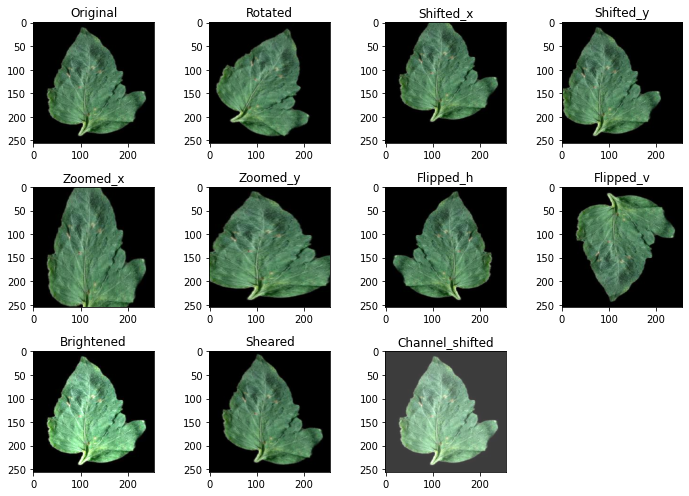

In [21]:
# Create an example data generator
example_data_gen = ImageDataGenerator()

example_gen = example_data_gen.flow_from_directory(directory=training_dir,
                                                          target_size=(256,256),
                                                          color_mode='rgb',
                                                          classes=None,
                                                          class_mode='categorical',
                                                          batch_size=16,
                                                          shuffle=True,
                                                          seed=seed)

# Get sample image
image = example_gen[384][0][0]

theta=30 # clockwise rotation degrees
tx=30 # translation on x axis
ty=30 # translation on y axis
zx=0.7 # zoom on x axis
zy=0.7 # # zoom on y axis
flip_h=1 # horizontal flip
flip_v=1 #vertical flip
brightness=1.5 # brightness intensity
shear=10 # shear intensity
channel_shift_intensity=60

# Apply the transformation
gen = ImageDataGenerator(fill_mode='nearest', cval=0.)
rotated = gen.apply_transform(image, {'theta':theta})
shifted_x = gen.apply_transform(image, {'tx':tx}) 
shifted_y = gen.apply_transform(image, {'ty':ty})
zoomed_x = gen.apply_transform(image, {'zx':zx})
zoomed_y = gen.apply_transform(image, {'zy':zy}) 
flipped_h = gen.apply_transform(image, {'flip_horizontal':flip_h})
flipped_v = gen.apply_transform(image, {'flip_vertical':flip_v})
brightened = gen.apply_transform(image, {'brightness':brightness})
sheared = gen.apply_transform(image, {'shear': shear})
channel_shifted = gen.apply_transform(image, {'channel_shift_intensity': channel_shift_intensity} )

# Show the transformations
rows = 3
columns = 4

transformations = [image, rotated, shifted_x, shifted_y, zoomed_x, zoomed_y, flipped_h, flipped_v,
                  brightened, sheared, channel_shifted, ]
labels = ['Original', 'Rotated', 'Shifted_x', 'Shifted_y', 'Zoomed_x', 'Zoomed_y', 'Flipped_h', 'Flipped_v',
         'Brightened', 'Sheared', 'Channel_shifted']

fig, axes = plt.subplots(rows, columns, figsize=(10, 7))
for i, transf in zip(range(rows*columns), transformations):
  if i < 11:
    ax = axes[i//columns, i%columns]
    ax.imshow(np.uint8(transformations[i]))
    ax.set_title('{}'.format(labels[i]))
fig.delaxes(axes[2, 3])
plt.tight_layout()
plt.show()